In [77]:
# Kütüphanelerin yüklenmesi
import 22y as np, pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as split
from sklearn.preprocessing import StandardScaler as SS

In [78]:
# verisetinin yüklenmesi
df=pd.read_excel('balıkesir.xlsx', header=None, names=["Tarih", "PM10(µg/m³)", "SO2(µg/m³)", "NO2(µg/m³)",
                          "O3(µg/m³)","Hava_Sıcaklığı(°C)","Ruzgar_Yönü(Derece)"])
df=df.drop([0, 1], axis=0)
df


,Tarih,PM10(µg/m³),SO2(µg/m³),NO2(µg/m³),O3(µg/m³),Hava_Sıcaklığı(°C),Ruzgar_Yönü(Derece)
2,2020-05-17 15:00:56,49.0282,185.595,11.9007,114.881,36.7585,218.719
3,2020-05-17 14:00:56,46.0847,185.619,15.8814,80.3083,35.1436,184.76
4,2020-05-17 13:00:56,48.9153,185.822,15.1374,49.4622,32.5576,167.915
5,2020-05-17 12:00:56,49.9718,188.621,20.9616,32.4833,28.7016,175.51
6,2020-05-17 11:00:56,49.0282,191.44,27.5179,31.4211,26.6155,221.302
...,...,...,...,...,...,...,...
718,2020-04-17 19:00:56,18.2266,13.4536,20.9388,69.0594,21.9306,187.434
719,2020-04-17 18:00:56,28.7507,14.3557,19.8125,54.8756,24.7988,207.426
720,2020-04-17 17:00:56,32.9094,9.62241,14.6142,73.4117,24.8126,204.176
721,2020-04-17 16:00:56,36.9094,1.1041,20.661,75.0206,24.1747,197.476


In [79]:
# Eksik verilerin tamamlanması
print("Sütun bazlı Eksik veri sayısı:\n",df.isnull().sum(),"\n")
data=df.fillna(df.mean())
print("Veri tamamlama işleminden sonra Eksik veri sayısı:\n",data.isnull().sum())

Sütun bazlı Eksik veri sayısı:
 Tarih                  0
PM10(µg/m³)            4
SO2(µg/m³)             2
NO2(µg/m³)             2
O3(µg/m³)              4
Hava_Sıcaklığı(°C)     0
Ruzgar_Yönü(Derece)    0
dtype: int64 

Veri tamamlama işleminden sonra Eksik veri sayısı:
 Tarih                  0
PM10(µg/m³)            0
SO2(µg/m³)             0
NO2(µg/m³)             0
O3(µg/m³)              0
Hava_Sıcaklığı(°C)     0
Ruzgar_Yönü(Derece)    0
dtype: int64


In [80]:
data

,Tarih,PM10(µg/m³),SO2(µg/m³),NO2(µg/m³),O3(µg/m³),Hava_Sıcaklığı(°C),Ruzgar_Yönü(Derece)
2,2020-05-17 15:00:56,49.02825,185.595200,11.90065,114.88110,36.75846,218.7193
3,2020-05-17 14:00:56,46.08475,185.618500,15.88141,80.30833,35.14362,184.7596
4,2020-05-17 13:00:56,48.91525,185.822100,15.13741,49.46222,32.55756,167.9150
5,2020-05-17 12:00:56,49.97175,188.621000,20.96164,32.48333,28.70163,175.5102
6,2020-05-17 11:00:56,49.02825,191.439800,27.51789,31.42111,26.61555,221.3015
...,...,...,...,...,...,...,...
718,2020-04-17 19:00:56,18.22663,13.453600,20.93882,69.05945,21.93063,187.4339
719,2020-04-17 18:00:56,28.75071,14.355700,19.81254,54.87556,24.79877,207.4257
720,2020-04-17 17:00:56,32.90935,9.622406,14.61421,73.41167,24.81263,204.1764
721,2020-04-17 16:00:56,36.90935,1.104095,20.66096,75.02055,24.17472,197.4757


In [81]:
# Değerlerin standartlaştırılması
X=data.drop(["Tarih","index"],axis=1)
X=SS().fit_transform(X)
X

array([[ 1.75259173,  2.63501622, -0.54060657,  2.27342438,  2.86278565,
         1.31486468],
       [ 1.51965382,  2.63542136, -0.23338739,  1.08979276,  2.62005177,
         0.36232364],
       [ 1.74364932,  2.63896156, -0.29080634,  0.03374689,  2.23132943,
        -0.11015323],
       ...,
       [ 0.47700046, -0.42480437, -0.33118483,  0.85367906,  1.0671541 ,
         0.90694856],
       [ 0.79354595, -0.57292104,  0.13547922,  0.90876059,  0.97126697,
         0.71899955],
       [ 1.34212008, -0.56133184,  0.46330594,  0.64738829,  0.78142576,
         1.25038807]])

In [82]:
day=data.groupby("Tarih")
data

,Tarih,PM10(µg/m³),SO2(µg/m³),NO2(µg/m³),O3(µg/m³),Hava_Sıcaklığı(°C),Ruzgar_Yönü(Derece)
2,2020-05-17 15:00:56,49.02825,185.595200,11.90065,114.88110,36.75846,218.7193
3,2020-05-17 14:00:56,46.08475,185.618500,15.88141,80.30833,35.14362,184.7596
4,2020-05-17 13:00:56,48.91525,185.822100,15.13741,49.46222,32.55756,167.9150
5,2020-05-17 12:00:56,49.97175,188.621000,20.96164,32.48333,28.70163,175.5102
6,2020-05-17 11:00:56,49.02825,191.439800,27.51789,31.42111,26.61555,221.3015
...,...,...,...,...,...,...,...
718,2020-04-17 19:00:56,18.22663,13.453600,20.93882,69.05945,21.93063,187.4339
719,2020-04-17 18:00:56,28.75071,14.355700,19.81254,54.87556,24.79877,207.4257
720,2020-04-17 17:00:56,32.90935,9.622406,14.61421,73.41167,24.81263,204.1764
721,2020-04-17 16:00:56,36.90935,1.104095,20.66096,75.02055,24.17472,197.4757


In [83]:
# Her bir sütunun(özelliğin) alt/üst aralıkları
maxp=pd.Series.max(data["PM10(µg/m³)"])
minp=pd.Series.min(data["PM10(µg/m³)"])

maxs=pd.Series.max(data["SO2(µg/m³)"])
mins=pd.Series.min(data["SO2(µg/m³)"])

maxn=pd.Series.max(data["NO2(µg/m³)"])
minn=pd.Series.min(data["NO2(µg/m³)"])

maxo=pd.Series.max(data["O3(µg/m³)"])
mino=pd.Series.min(data["O3(µg/m³)"])

maxh=pd.Series.max(data["Hava_Sıcaklığı(°C)"])
minh=pd.Series.min(data["Hava_Sıcaklığı(°C)"])

maxr=pd.Series.max(data["Ruzgar_Yönü(Derece)"])
minr=pd.Series.min(data["Ruzgar_Yönü(Derece)"])

print("Max PM10: ",maxp,"\nMin PM10: ",minp,"\n")
print("Max SO2: ",maxs,"\nMin SO2: ",mins,"\n")
print("Max NO2: ",maxn,"\nMin NO2: ",minn,"\n")
print("Max O3: ",maxo,"\nMin O3: ",mino,"\n")
print("Max Hava_Sıcaklığı: ",maxh,"\nMin Hava_Sıcaklığı: ",minh,"\n")
print("Max Ruzgar_Yönü: ",maxr,"\nMin Ruzgar_Yönü: ",minr,"\n")


Max PM10:  80.06516 
Min PM10:  4.028249 

Max SO2:  195.2484 
Min SO2:  1.104095 

Max NO2:  67.86644 
Min NO2:  1.167357 

Max O3:  118.0022 
Min O3:  2.794445 

Max Hava_Sıcaklığı:  36.81385 
Min Hava_Sıcaklığı:  6.154947 

Max Ruzgar_Yönü:  254.7259 
Min Ruzgar_Yönü:  60.42127 



In [84]:
def hci(index):
    if index>0 and index<=50:
        return 0; "iyi"
    elif index<=1020:
        return 1; "orta"
    elif index<=150:
        return 2; "hassas"
    elif index<=200:
        return 3; "sagliksiz"
    elif index<=300:
        return 4; "kotu"
    elif index<=500:
        return 5; "tehlikeli"

In [85]:
dataindex=pd.DataFrame(data, columns=["Index"])
dataindex["Index"]=5
dataindex

,Index
2,5
3,5
4,5
5,5
6,5
...,...
718,5
719,5
720,5
721,5


In [ ]:
# Sınıf sayısının belirlenmesi
label_encoder=LabelEncoder().fit(data.index)
labels=label_encoder.transform(data.index)
classes=list(label_encoder.classes_) # [0,1,2,3,4,5]

In [ ]:
# Girdi ve Çıktı Değerlerinin Hazırlanması
X=data.drop(['index', 'Tarih'], axis=1)
y=labels

In [ ]:
# Eğitim ve test aşamalarının hazırlanması
# eğitim ile test ayrılır
from sklearn.model_selection import train_test_split 
# verilerin %80i eğitim, %20sini test için kullanılır.
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2) 

In [ ]:
# Çıktılar Kategorize edilir.
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
# YSA modelinin oluşturulması
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model=Sequential()
#Girdi Katmanı 16 nöron 
model.add(Dense(16,input_dim=7,activation="relu")) 
# AraKatman 12 nöron
model.add(Dense(12,activation="relu"))
# Çıktı Katmanı 6 nöron
model.add(Dense(6,activation="softmax"))
# Oluşturulan model
model.summary() 

In [ ]:
# Modelin Derlenmesi
model.compile(loss="categorical_crossentropy",optimizer="adam", metrics=["accuracy"])

In [ ]:
# Modelin Eğitilmesi
model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=100)

In [ ]:
# Gerekli Değerlerin Gösterilmesi
print("Ortalama Eğitim Kaybı: ",np.mean(model.history.history(["loss"])))
print("Ortalama Eğitim Başarımı: ",np.mean(model.history.history(["accuracy"])))
print("Ortalama Doğrulama Kaybı: ",np.mean(model.history.history(["val_loss"])))
print("Ortalama Doğrulama Başarımı: ",np.mean(model.history.history(["val_accuracy"])))

In [ ]:
# Eğitim ve doğrulama başarımlarının Gösterimi
import matplotlib .pyplot as plt
plt.plot(model.history.history["accuracy"])
plt.plot(model.history.history["val_accuracy"])
plt.title("Model Başarımı")
plt.ylabel("Başarım")
plt.xlabel("Epok")
plt.legend(["Eğitim","Test"], loc="upper left")
plt.show()

# Eğitim ve doğrulama kayıplarının Gösterimi
import matplotlib .pyplot as plt
plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.title("Model Kaybı")
plt.ylabel("Kayıp")
plt.xlabel("Epok")
plt.legend(["Eğitim","Test"], loc="upper left")
plt.show()

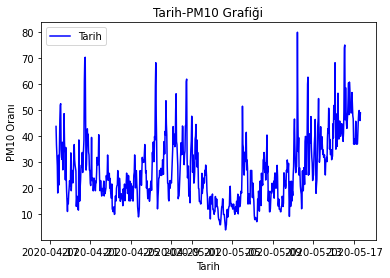

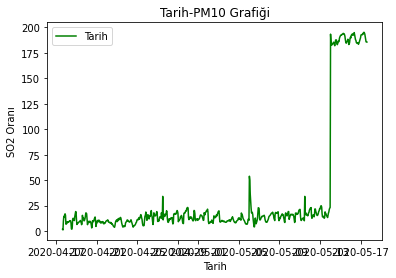

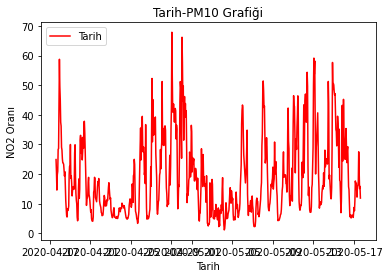

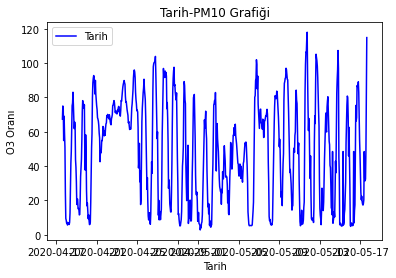

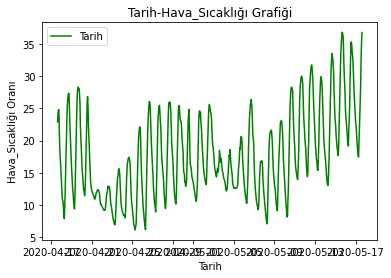

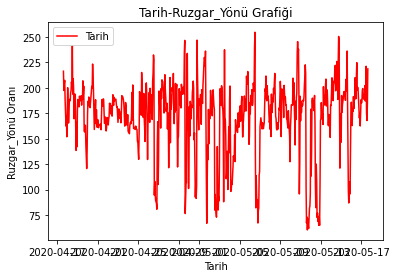

In [136]:
import matplotlib.pyplot as plt
plt.title("Tarih-PM10 Grafiği")
plt.plot(data["Tarih"],data["PM10(µg/m³)"],color="b")
plt.xlabel("Tarih")
plt.ylabel("PM10 Oranı")
plt.legend(["Tarih","PM10"], loc="upper left")
plt.show()
    
import matplotlib.pyplot as plt
plt.title("Tarih-PM10 Grafiği")
plt.plot(data["Tarih"],data["SO2(µg/m³)"],color="g")
plt.xlabel("Tarih")
plt.ylabel("SO2 Oranı")
plt.legend(["Tarih","SO2"], loc="upper left")
plt.show()

import matplotlib.pyplot as plt
plt.title("Tarih-PM10 Grafiği")
plt.plot(data["Tarih"],data["NO2(µg/m³)"],color="r")
plt.xlabel("Tarih")
plt.ylabel("NO2 Oranı")
plt.legend(["Tarih","NO2"], loc="upper left")
plt.show()    

import matplotlib.pyplot as plt
plt.title("Tarih-PM10 Grafiği")
plt.plot(data["Tarih"],data["O3(µg/m³)"],color="b")
plt.xlabel("Tarih")
plt.ylabel("O3 Oranı")
plt.legend(["Tarih","O3"], loc="upper left")
plt.show()

import matplotlib.pyplot as plt
plt.title("Tarih-Hava_Sıcaklığı Grafiği")
plt.plot(data["Tarih"],data["Hava_Sıcaklığı(°C)"],color="g")
plt.xlabel("Tarih")
plt.ylabel("Hava_Sıcaklığı Oranı")
plt.legend(["Tarih","Hava_Sıcaklığı"], loc="upper left")
plt.show()    

import matplotlib.pyplot as plt
plt.title("Tarih-Ruzgar_Yönü Grafiği")
plt.plot(data["Tarih"],data["Ruzgar_Yönü(Derece)"],color="r")
plt.xlabel("Tarih")
plt.ylabel("Ruzgar_Yönü Oranı")
plt.legend(["Tarih","Ruzgar_Yönü"], loc="upper left")
plt.show()
